In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Importing data and looking at its columns

In [2]:
df=pd.read_csv("/kaggle/input/weatherdata/seattle-weather.csv")


In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df["date"]=pd.to_datetime(df["date"])

# Analyse the data using simple visualization as peichart, line graph, and bar graphs

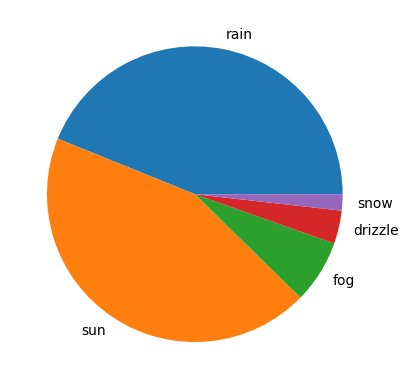

In [7]:
count = df['weather'].value_counts()
plt.pie(count, labels= pd.DataFrame(count).index.to_list())
plt.show() 

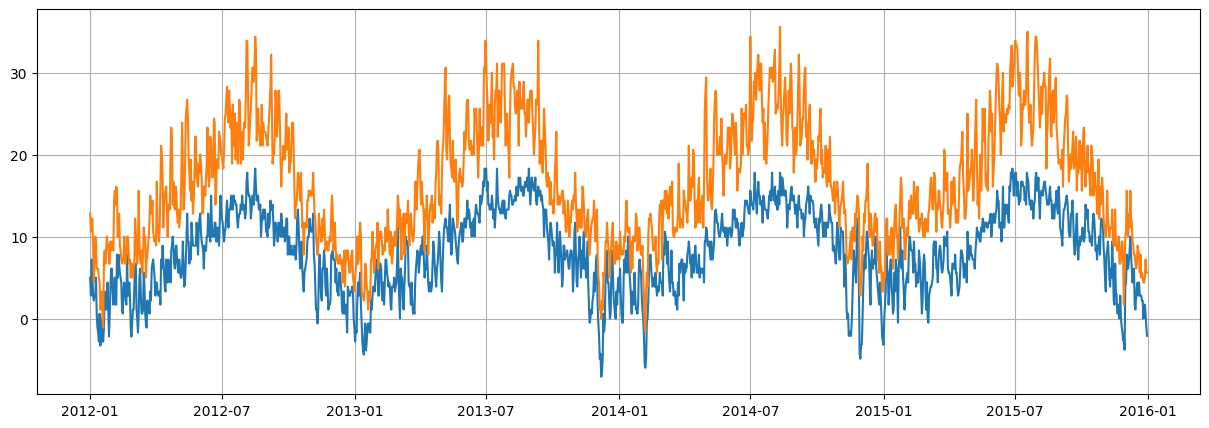

In [8]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['date'], df[['temp_min', 'temp_max']])
plt.grid();

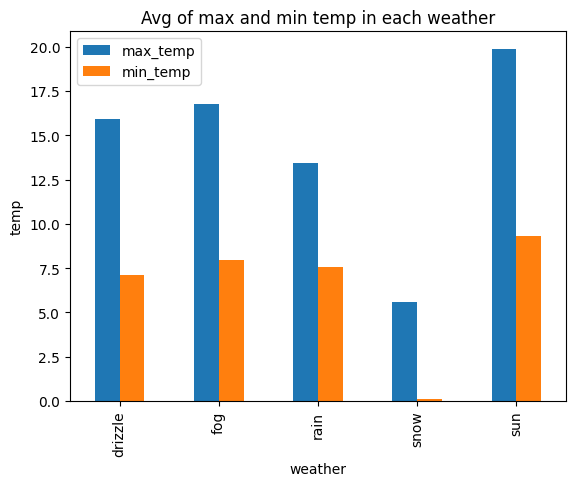

In [9]:
min_temp = df.groupby('weather')['temp_min'].mean().reset_index()
max_temp = df.groupby('weather')['temp_max'].mean().reset_index()
df_temp = pd.DataFrame({'max_temp':max_temp['temp_max'].to_list(),
                        'min_temp':min_temp['temp_min'].to_list()}, index=min_temp['weather'])
ax = df_temp.plot.bar(ylabel = 'temp',title="Avg of max and min temp in each weather")

In [10]:
df['Year'] = df['date'].dt.year

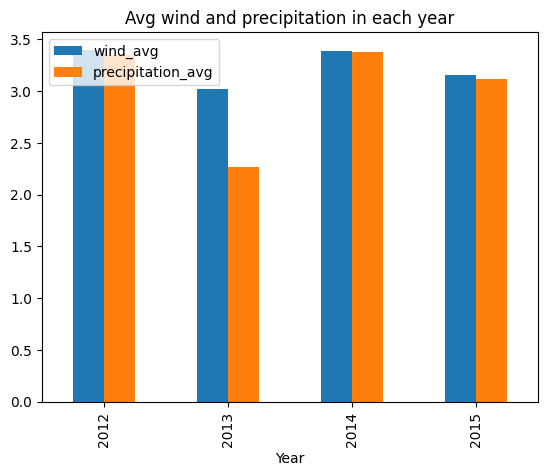

In [11]:
wind_avg=df.groupby(by=["Year"])["wind"].mean().reset_index()
precipitation_avg=df.groupby(by=["Year"])["precipitation"].mean().reset_index()

df_temp = pd.DataFrame({'wind_avg':wind_avg['wind'].to_list(),
                        'precipitation_avg':precipitation_avg['precipitation'].to_list()}, 
                       index=precipitation_avg['Year'])
ax = df_temp.plot.bar(title="Avg wind and precipitation in each year")


# Splitting the data for ML training and testing

In [12]:
#X = df.drop(columns=['weather',"Year",'date'])
df['weather']=LabelEncoder().fit_transform(df['weather'])
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y = df.weather

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=44)

# Simple Logistic regression method

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
predictions = model.predict(X_test)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        31
           2       0.96      0.93      0.94       206
           3       0.67      0.20      0.31        10
           4       0.78      1.00      0.87       219

    accuracy                           0.85       483
   macro avg       0.48      0.42      0.42       483
weighted avg       0.77      0.85      0.80       483



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XgbClassifier

In [18]:
C1 = XGBClassifier()
C1.fit(X_train,y_train)
print("XGB Accuracy:{:.2f}%".format(C1.score(X_test,y_test)*100))

XGB Accuracy:83.44%


# Adaboostclassifier

In [19]:
C2 = AdaBoostClassifier()
C2.fit(X_train, y_train)
print("AB Accuracy:{:.2f}%".format(C2.score(X_test,y_test)*100))

AB Accuracy:76.60%


# Testing on Xgbclassifier 

In [20]:
y_pred = C1.predict(X_test)
print(classification_report(y_test.values, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.35      0.26      0.30        31
           2       0.96      0.92      0.94       206
           3       0.56      0.50      0.53        10
           4       0.81      0.92      0.86       219

    accuracy                           0.83       483
   macro avg       0.53      0.52      0.52       483
weighted avg       0.81      0.83      0.82       483

